In [1]:
# Import all Neccessary Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, silhouette_score    
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from datetime import datetime
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [2]:
chunksize = 10 ** 6 # or any other chunk size
chunks = []

for chunk in pd.read_csv('cross_selling.csv', chunksize=chunksize):
    chunks.append(chunk)

cust = pd.concat(chunks, ignore_index=True)


C:\Users\kpsam\AppData\Local\Temp\ipykernel_26500\1817902870.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('cross_selling.csv', chunksize=chunksize):
C:\Users\kpsam\AppData\Local\Temp\ipykernel_26500\1817902870.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('cross_selling.csv', chunksize=chunksize):
C:\Users\kpsam\AppData\Local\Temp\ipykernel_26500\1817902870.py:4: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('cross_selling.csv', chunksize=chunksize):
C:\Users\kpsam\AppData\Local\Temp\ipykernel_26500\1817902870.py:4: DtypeWarning: Columns (5,8,10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('cross_selling.csv', chunksize=chunksize):
C:\Users\kpsam\AppData\Local\Temp\i

In [3]:
cust

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
cust.columns = ['Date','Customer Code','Employee Status','Country of Residence','Sex','Age','First Contract Date','Registered Customer','Customer Seniority','Primary Type','Primary C Date', 'Customer Type','Customer Rel Type','Residence Index','Foreigner Index','Spouse Index','Channel','Deceased Index','Address Type','Province Code','Province Name','Activity Index','Gross Income','Customer Segment','Saving Acc', 'Guarantees','Current Acc','Derivada Acc','Payroll Acc','Junior Acc','Mas Particular Acc','Particular Acc','Particular Plus Acc','Short-Term Deps','Medium-Term Deps','Long-Term Deps','e-acc','Funds','Mortgage','Pensions','Loans','Taxes','Credit Card','Securities','Home Acc','Payroll','Pensions 1','Direct Debit' ]


In [5]:
cust

,Date,Customer Code,Employee Status,Country of Residence,Sex,Age,First Contract Date,Registered Customer,Customer Seniority,Primary Type,...,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Acc,Payroll,Pensions 1,Direct Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [6]:
cust.isnull().sum()

Date                           0
Customer Code                  0
Employee Status            27734
Country of Residence       27734
Sex                        27804
Age                            0
First Contract Date        27734
Registered Customer        27734
Customer Seniority             0
Primary Type               27734
Primary C Date          13622516
Customer Type             149781
Customer Rel Type         149781
Residence Index            27734
Foreigner Index            27734
Spouse Index            13645501
Channel                   186126
Deceased Index             27734
Address Type               27735
Province Code              93591
Province Name              93591
Activity Index             27734
Gross Income             2794375
Customer Segment          189368
Saving Acc                     0
Guarantees                     0
Current Acc                    0
Derivada Acc                   0
Payroll Acc                    0
Junior Acc                     0
Mas Partic

In [7]:
cust = cust.dropna(subset=['Employee Status', 'Sex','Province Code','Province Name','Channel','Payroll','Pensions 1'])
cust['Spouse Index'] = cust['Spouse Index'].fillna(0)
cust['Primary C Date'] = cust['Primary C Date'].fillna('2015-02-28')
cust['Gross Income'] = cust['Gross Income'].fillna(cust['Gross Income'].mean())

C:\Users\kpsam\AppData\Local\Temp\ipykernel_26500\4229869640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['Spouse Index'] = cust['Spouse Index'].fillna(0)
C:\Users\kpsam\AppData\Local\Temp\ipykernel_26500\4229869640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['Primary C Date'] = cust['Primary C Date'].fillna('2015-02-28')
C:\Users\kpsam\AppData\Local\Temp\ipykernel_26500\4229869640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [8]:
cust

,Date,Customer Code,Employee Status,Country of Residence,Sex,Age,First Contract Date,Registered Customer,Customer Seniority,Primary Type,...,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Acc,Payroll,Pensions 1,Direct Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647303,2016-05-28,1166766,N,ES,V,25,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [9]:
cust.dtypes

Date                     object
Customer Code             int64
Employee Status          object
Country of Residence     object
Sex                      object
Age                      object
First Contract Date      object
Registered Customer     float64
Customer Seniority       object
Primary Type            float64
Primary C Date           object
Customer Type            object
Customer Rel Type        object
Residence Index          object
Foreigner Index          object
Spouse Index             object
Channel                  object
Deceased Index           object
Address Type            float64
Province Code           float64
Province Name            object
Activity Index          float64
Gross Income            float64
Customer Segment         object
Saving Acc                int64
Guarantees                int64
Current Acc               int64
Derivada Acc              int64
Payroll Acc               int64
Junior Acc                int64
Mas Particular Acc        int64
Particul

In [10]:
cust['Date'] = pd.to_datetime(cust['Date'], errors='coerce')
cust['Primary C Date'] = pd.to_datetime(cust['Primary C Date'], errors='coerce')
cust['First Contract Date'] = pd.to_datetime(cust['First Contract Date'], errors='coerce')
cust['Registered Customer'] = cust['Registered Customer'].astype('int64')
cust['Customer Seniority'] = cust['Customer Seniority'].astype('int64')
cust['Primary Type'] = cust['Primary Type'].astype('int64')
cust['Address Type'] = cust['Address Type'].astype('int64')
cust['Activity Index'] = cust['Activity Index'].astype('int64')
cust = cust.drop(['Payroll', 'Pensions 1','Spouse Index'], axis=1)


C:\Users\kpsam\AppData\Local\Temp\ipykernel_26500\2800925015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['Date'] = pd.to_datetime(cust['Date'], errors='coerce')
C:\Users\kpsam\AppData\Local\Temp\ipykernel_26500\2800925015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['Primary C Date'] = pd.to_datetime(cust['Primary C Date'], errors='coerce')
C:\Users\kpsam\AppData\Local\Temp\ipykernel_26500\2800925015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [11]:
cust['Sex'] = cust['Sex'].apply(lambda s: 1 if s == 'H' else 0)
cust['Employee Status'] = cust['Employee Status'].apply(lambda s: 1 if s == 'A' else 2 if s == 'B' else 3 if s == 'F' else 4 if s == 'N' else 5 )
cust['Customer Rel type'] = cust['Customer Rel Type'].apply(lambda s: 1 if s == 'A' else 2 if s == 'I' else 3 if s == 'P' else 4)
cust['Customer Type'] = cust['Customer Type'].replace('P',5)
cust['Residence Index'] = cust['Residence Index'].apply(lambda s: 1 if s == 'S' else 0)

In [12]:
cust['Foreigner Index'] = cust['Foreigner Index'].apply(lambda s: 1 if s == 'S' else 0)

In [13]:
cust['Deceased Index'] = cust['Deceased Index'].apply(lambda s: 1 if s == 'S' else 0)

In [14]:
cust

,Date,Customer Code,Employee Status,Country of Residence,Sex,Age,First Contract Date,Registered Customer,Customer Seniority,Primary Type,...,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Acc,Direct Debit,Customer Rel type
0,2015-01-28,1375586,4,ES,1,35,2015-01-12,0,6,1,...,0,0,0,0,0,0,0,0,0,1
1,2015-01-28,1050611,4,ES,0,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,2
2,2015-01-28,1050612,4,ES,0,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,2
3,2015-01-28,1050613,4,ES,1,22,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,2
4,2015-01-28,1050614,4,ES,0,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647303,2016-05-28,1166766,4,ES,0,25,2013-08-14,0,33,1,...,0,0,0,0,0,0,0,0,0,2
13647304,2016-05-28,1166765,4,ES,0,22,2013-08-14,0,33,1,...,0,0,0,0,0,0,0,0,0,2
13647305,2016-05-28,1166764,4,ES,0,23,2013-08-14,0,33,1,...,0,0,0,0,0,0,0,0,0,2
13647306,2016-05-28,1166763,4,ES,1,47,2013-08-14,0,33,1,...,0,0,0,0,0,0,0,0,0,1


In [15]:

cust_corr = cust[['Employee Status', 'Sex','Age','Registered Customer','Customer Seniority','Primary Type','Customer Type','Residence Index','Foreigner Index','Deceased Index','Address Type','Activity Index','Gross Income','Saving Acc', 'Guarantees','Current Acc','Derivada Acc','Payroll Acc','Junior Acc','Mas Particular Acc','Particular Acc','Particular Plus Acc','Short-Term Deps','Medium-Term Deps','Long-Term Deps','e-acc','Funds','Mortgage','Pensions','Loans','Taxes','Credit Card','Securities','Home Acc','Direct Debit' ]]

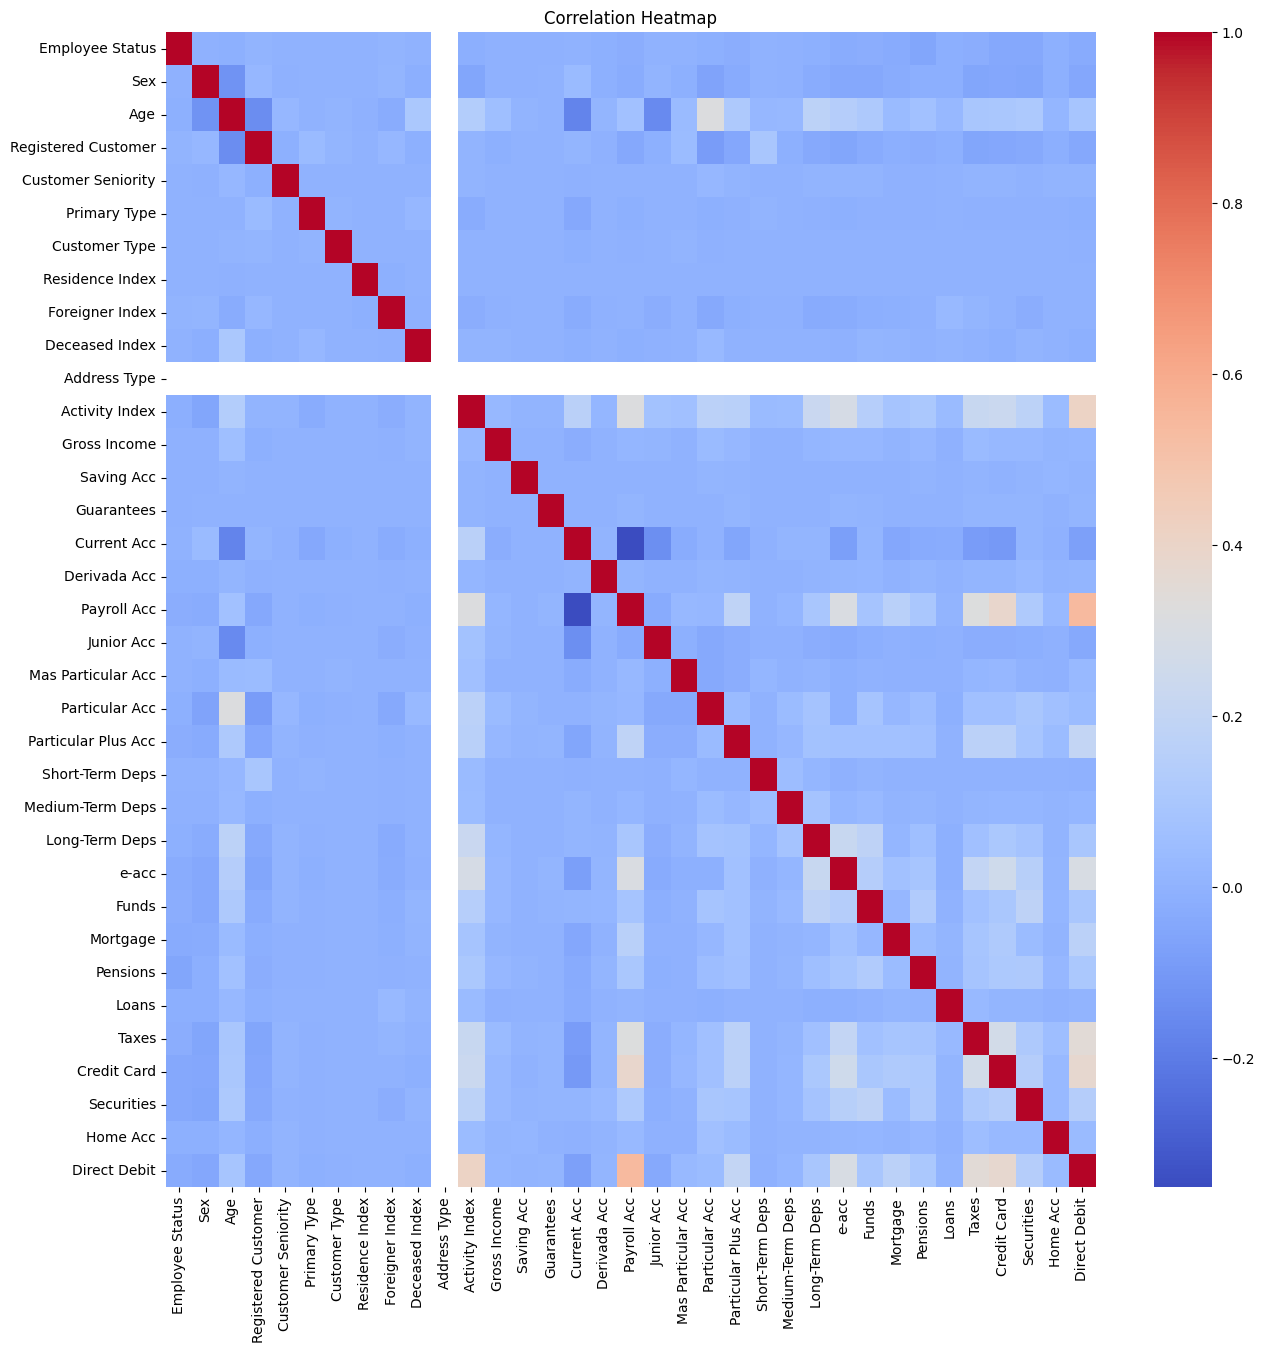

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(cust_corr.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
cust['Age'] = cust['Age'].astype('int64')
cust['Age'] = pd.cut(cust['Age'], bins=[0, 18, 25, 35, 45, 55, 65, 75, 100], labels=['0-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75+'], include_lowest=True)
cust['Gross Income'] = pd.cut(cust['Gross Income'], bins=[0, 10000, 50000, 100000, 500000, 1000000], labels=['Low', 'Mid', 'High', 'Very High', 'Ultra High'], include_lowest=True)
cust['Total Deposits'] = cust['Short-Term Deps']+cust['Medium-Term Deps']+cust['Long-Term Deps']
cust['Total Accs'] = cust['Saving Acc'] + cust['Current Acc']+cust['Derivada Acc']+cust['Payroll Acc']+cust['Junior Acc']+cust['e-acc']+cust['Home Acc']
cust['Total Particular Accs'] = cust['Mas Particular Acc']+cust['Particular Acc']+cust['Particular Plus Acc']
cust['Total Loans'] = cust['Loans']+cust['Credit Card']+cust['Mortgage']+cust['Taxes']+cust['Direct Debit']
cust['Total Savings'] = cust['Funds']+cust['Pensions']+cust['Securities']

In [18]:
cust.to_csv('Cross_Final.csv', index=False)

In [19]:
cust['Total Products'] = cust['Total Deposits']+cust['Total Accs']+cust['Total Particular Accs']+cust['Total Loans']+cust['Total Savings']
cust

,Date,Customer Code,Employee Status,Country of Residence,Sex,Age,First Contract Date,Registered Customer,Customer Seniority,Primary Type,...,Securities,Home Acc,Direct Debit,Customer Rel type,Total Deposits,Total Accs,Total Particular Accs,Total Loans,Total Savings,Total Products
0,2015-01-28,1375586,4,ES,1,25-35,2015-01-12,0,6,1,...,0,0,0,1,0,1,0,0,0,1
1,2015-01-28,1050611,4,ES,0,18-25,2012-08-10,0,35,1,...,0,0,0,2,0,1,0,0,0,1
2,2015-01-28,1050612,4,ES,0,18-25,2012-08-10,0,35,1,...,0,0,0,2,0,1,0,0,0,1
3,2015-01-28,1050613,4,ES,1,18-25,2012-08-10,0,35,1,...,0,0,0,2,1,0,0,0,0,1
4,2015-01-28,1050614,4,ES,0,18-25,2012-08-10,0,35,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647303,2016-05-28,1166766,4,ES,0,18-25,2013-08-14,0,33,1,...,0,0,0,2,0,1,0,0,0,1
13647304,2016-05-28,1166765,4,ES,0,18-25,2013-08-14,0,33,1,...,0,0,0,2,0,1,0,0,0,1
13647305,2016-05-28,1166764,4,ES,0,18-25,2013-08-14,0,33,1,...,0,0,0,2,0,1,0,0,0,1
13647306,2016-05-28,1166763,4,ES,1,45-55,2013-08-14,0,33,1,...,0,0,0,1,0,1,0,0,0,1


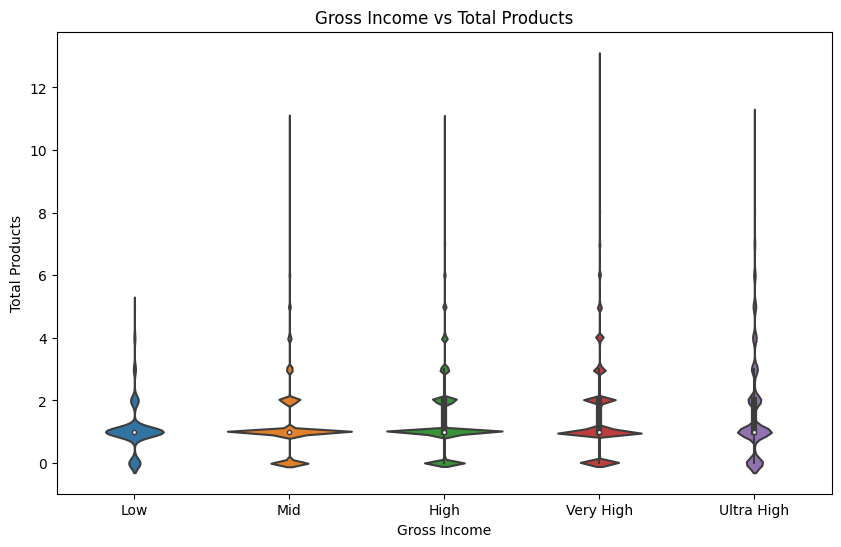

In [20]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Gross Income', y='Total Products', data=cust)
plt.title('Gross Income vs Total Products')
plt.show()

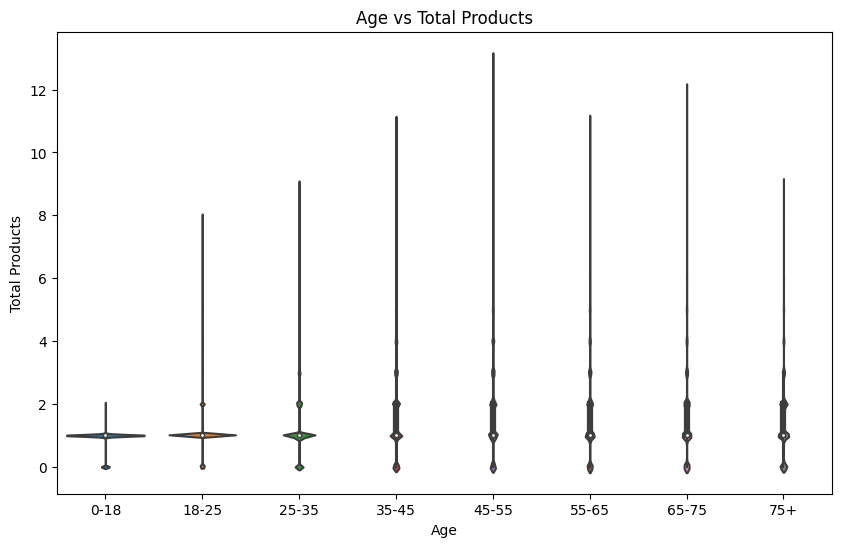

In [21]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Age', y='Total Products', data=cust)
plt.title('Age vs Total Products')
plt.show()

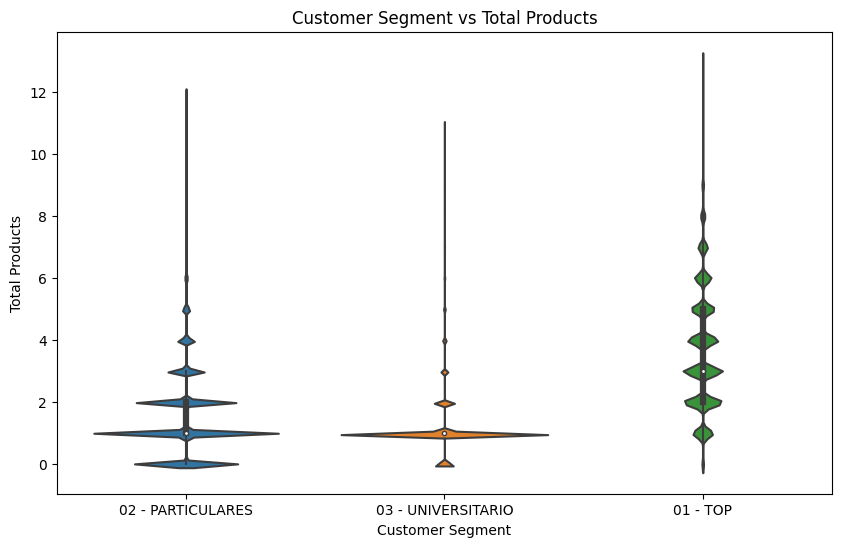

In [22]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Customer Segment', y='Total Products', data=cust)
plt.title('Customer Segment vs Total Products')
plt.show()

In [27]:
Cust_Cross_Sell = cust[['Customer Code', 'Saving Acc', 'Guarantees','Current Acc','Derivada Acc','Payroll Acc','Junior Acc','Mas Particular Acc','Particular Acc','Particular Plus Acc','Short-Term Deps','Medium-Term Deps','Long-Term Deps','e-acc','Funds','Mortgage','Pensions','Loans','Taxes','Credit Card','Securities','Home Acc','Direct Debit']]

In [28]:
Cust_Cross_Sell = Cust_Cross_Sell.astype(float)

In [29]:
Cust_Cross_Sell['Customer Code'] = Cust_Cross_Sell['Customer Code'].astype('object')

In [30]:
q = len(Cust_Cross_Sell) // 10

In [31]:
Cust_Cross_Sell_half = Cust_Cross_Sell.iloc[q:]

In [32]:
frequent_itemsets = apriori(Cust_Cross_Sell_half[['Saving Acc', 'Guarantees','Current Acc','Derivada Acc','Payroll Acc','Junior Acc','Mas Particular Acc','Particular Acc','Particular Plus Acc','Short-Term Deps','Medium-Term Deps','Long-Term Deps','e-acc','Funds','Mortgage','Pensions','Loans','Taxes','Credit Card','Securities','Home Acc','Direct Debit']], min_support=0.01, use_colnames=True)

C:\Users\kpsam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


MemoryError: Unable to allocate 17.1 GiB for an array with shape (76, 3, 10046507) and data type float64

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
cross_sell = rules[(rules['antecedents'].apply(len)==1) &
                  (rules['consequents'].apply(len)==1)]

print(cross_sell)